In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
X_train.shape

(1347, 64)

In [6]:
y_train.shape

(1347,)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 4.99 ms


In [14]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [18]:
pca.components_.shape

(2, 64)

In [26]:
%%time
knn_clf.fit(X_train_reduction, y_train)

Wall time: 996 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

### 主成分所解释的的方差

In [28]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [29]:
pca.explained_variance_

array([175.90066519, 165.86177754])

In [31]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.75900665e+02, 1.65861778e+02, 1.42221212e+02, 1.02637448e+02,
       7.07643502e+01, 6.17710422e+01, 5.15144485e+01, 4.34860203e+01,
       4.11900150e+01, 3.68793247e+01, 2.92633310e+01, 2.76165915e+01,
       2.17725729e+01, 2.16568122e+01, 1.76057805e+01, 1.71525342e+01,
       1.56933616e+01, 1.52895554e+01, 1.22841765e+01, 1.09803717e+01,
       1.06894232e+01, 9.34431468e+00, 9.18356511e+00, 8.59607873e+00,
       8.28347475e+00, 6.96042539e+00, 6.90338223e+00, 6.13740938e+00,
       5.90513920e+00, 5.25146335e+00, 4.50314155e+00, 4.32004813e+00,
       3.94854050e+00, 3.80277147e+00, 3.73456822e+00, 3.47313274e+00,
       3.02323841e+00, 2.72201348e+00, 2.65696859e+00, 2.39128350e+00,
       2.27254370e+00, 1.84475573e+00, 1.72465838e+00, 1.66645054e+00,
       1.41973793e+00, 1.29662971e+00, 1.15338826e+00, 1.08681056e+00,
       6.99364060e-01, 4.62240112e-01, 2.87792165e-01, 1.01449631e-01,
       6.76883251e-02, 6.62384688e-02, 1.30508477e-02, 4.84653330e-03,
      

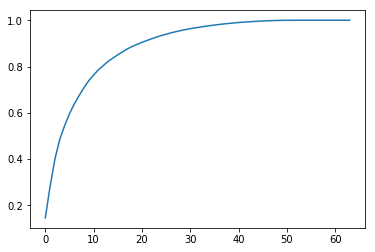

In [32]:
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[: i + 1]) for i in range(X_train.shape[1])])
plt.show()

In [33]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.n_components_

28

In [36]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [41]:
%%time
knn_clf.fit(X_train_reduction, y_train)

Wall time: 2.96 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
knn_clf.score(X_test_reduction, y_test)

0.98

### 使用PCA对数据进行降维可视化

In [43]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
X_reduction = pca.transform(X)

In [59]:
X_reduction.shape

(1797, 2)

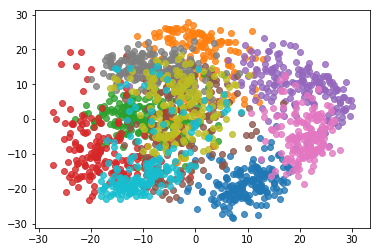

In [57]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.8)
plt.show()